In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 파일 읽어오는 방법
Antartica_mass = pd.read_csv('data/antartica_mass.csv')


In [42]:
# 년월을 하나로 합치기
Antartica_mass['day'] = 0
for i in range(len(Antartica_mass)):
    Antartica_mass['day'][i] = str(Antartica_mass['year'][i]) + ' ' + str(Antartica_mass["month"][i])
# 년, 월 컬럼 제거
# Antartica_mass.drop(columns = ['year', 'month', 'day'], inplace=True)
print(Antartica_mass)

     year  month     mass      day
0    2002      4     0.00   2002 4
1    2002      5    23.70   2002 5
2    2002      8   -51.67   2002 8
3    2002      9    47.89   2002 9
4    2002     10    72.21  2002 10
..    ...    ...      ...      ...
202  2022      3 -2630.04   2022 3
203  2022      4 -2298.75   2022 4
204  2022      5 -2155.93   2022 5
205  2022      6 -2358.85   2022 6
206  2022      7 -2419.38   2022 7

[207 rows x 4 columns]


C:\Users\multicampus\AppData\Local\Temp\ipykernel_16124\3150242207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Antartica_mass['day'][i] = str(Antartica_mass['year'][i]) + ' ' + str(Antartica_mass["month"][i])


<Figure size 7000x500 with 0 Axes>

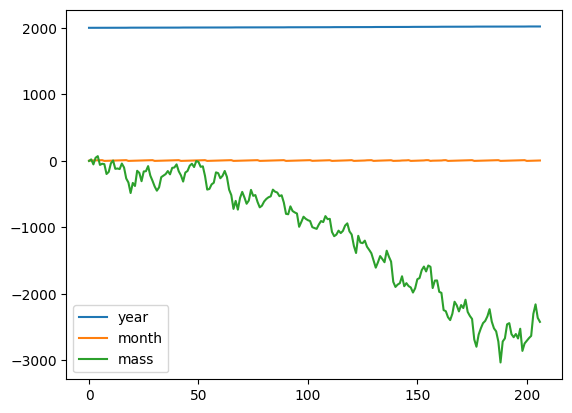

In [43]:
# matplotlib으로 데이터 확인 후 분석모델 결정하기
plt.figure(figsize = (70,5))
Antartica_mass.plot()
plt.show()

In [31]:
# 년도 별로 몇개 있는지 확인
for i in range(2002, 2022):
    print(f'{i} : ', end=" ")
    print(len(Antartica_mass[(Antartica_mass['year']==i)]))

2002 :  7
2003 :  11
2004 :  12
2005 :  12
2006 :  12
2007 :  12
2008 :  12
2009 :  12
2010 :  12
2011 :  9
2012 :  10
2013 :  9
2014 :  9
2015 :  8
2016 :  9
2017 :  4
2018 :  4
2019 :  12
2020 :  12
2021 :  12


In [32]:
# 각 달의 패턴 구하기
month = [0] * 13
for i in range(2004, 2011):
    sum_i = Antartica_mass[(Antartica_mass['year']==i)]['mass'].sum()
    for j in range(1, 13):
        month[j] = month[j] + Antartica_mass[(Antartica_mass['year']==i)&(Antartica_mass['month']==j)]['mass'].values[0]/sum_i
for i in range(2019, 2022):
    sum_i = Antartica_mass[(Antartica_mass['year']==i)]['mass'].sum()
    for j in range(1, 13):
        month[j] = month[j] + Antartica_mass[(Antartica_mass['year']==i)&(Antartica_mass['month']==j)]['mass'].values[0]/sum_i
#         print(month[j])

# print(month)
num = 0
for i in range(1, 13):
    month[i] /= (10)
    num += month[i]


print(month)
print(num)

[0, 0.10732268300995607, 0.11845429196759767, 0.09919090053822208, 0.08854821097758689, 0.06903872063857984, 0.06941283004229584, 0.07861336105100211, 0.06725414975807427, 0.05978714183491383, 0.06748592545979964, 0.07630955623165835, 0.0985822284903134]
1.0


In [33]:
# row값 전체로 볼 수 있게하기
# pd.set_option('display.max_rows', None)

In [34]:
# 위의 달의 패턴을 바탕으로 데이터가 없는 달에 값을 넣기


# 년도에서 데이터가 있는 달의 비율의 합을 구하기
for i in range(2002, 2023):
    # 해당 년도에서 데이터가 있는 달의 데이터 합을 구하기
    sum_i = Antartica_mass[(Antartica_mass['year']==i)]['mass'].sum()
    # 데이터가 없는 달의 value 구하기
    data_month = [False] * 13
    # 해당 년도 있는 달들의 비율의 합을 구하기
    sum_ratio = 0
    for j in range(1, 13):
        # 해당 년도에 이 데이터가 있는지 없는지 확인
        # 있는 경우
        if  (Antartica_mass[(Antartica_mass['year']==i) & (Antartica_mass['month']==j)]['mass']).any():
            sum_ratio += month[j]
        else:
            data_month[j] = True
    
    # 없는 달의 데이터만 추가해서 넣기
    for j in range(1, 13):
        # 없는 달의 데이터 
        if data_month[j]:
            # 그 달의 데이터 구하기 (이번년도의 있는 데이터의 합 / 이번년도 잇는 데이터의 달 비율 합 * 그달의 비율)
            value = sum_i / sum_ratio * month[j]
            Antartica_mass.loc[len(Antartica_mass)] = [i, j, value, str(i) + " " + str(j)]
# 년도와 월로 다시 정렬하기
Antartica_mass.sort_values(by=['year', 'month'], inplace=True)
Antartica_mass.drop(['day'], axis=1,inplace=True)
# 이 순으로 인덱스 정하기
Antartica_mass.reset_index(drop=True, inplace=True)
print(Antartica_mass)
        

     year  month         mass
0    2002      1    -2.288629
1    2002      2    -2.526008
2    2002      3    -2.115221
3    2002      4     0.000000
4    2002      4    -1.888268
..    ...    ...          ...
249  2022      8 -1837.773420
250  2022      9 -1633.731457
251  2022     10 -1844.106876
252  2022     11 -2085.219642
253  2022     12 -2693.838222

[254 rows x 3 columns]


In [35]:
#데이터 정리하기(2022년도 9월까지만 하기)
Antartica_mass.drop(labels=range(242,254), inplace=True)

In [36]:
year_list = [i for i in range(2002, 2022)]
sum_by_year = []
for i in year_list:
    sum_by_year.append(Antartica_mass[(Antartica_mass['year']==i)]['mass'].sum())

df = pd.DataFrame(data = list(zip(year_list, sum_by_year)), columns = ['Year', 'ice_mass'])
print(df)
        

    Year      ice_mass
0   2002    -21.324747
1   2003  -1279.794133
2   2004  -3051.890000
3   2005  -2652.560000
4   2006  -1466.810000
5   2007  -3703.260000
6   2008  -6949.170000
7   2009  -6667.040000
8   2010 -10004.980000
9   2011 -11559.231515
10  2012 -12234.639880
11  2013 -14811.794809
12  2014 -18959.604960
13  2015 -20542.374138
14  2016 -22314.250669
15  2017 -21230.432217
16  2018 -26172.807440
17  2019 -27026.760000
18  2020 -30222.060000
19  2021 -31953.360000


In [37]:
print(Antartica_mass[(Antartica_mass['year']==2004)&(Antartica_mass['month']==3)]["mass"].values)

[-330.45]


In [38]:
# 정리한 데이터 저장하기
df.to_csv("Antartica_mass.csv", index=False)